### 시각화 전략
- 시각화의 목표
- 시각화의 범위
- 시각화의 개발절차

### 시각화 요구사항
- 사용자 수준 / 취향
- 시나리오 : 스토리보드 개발

### 데이터 시각화 명세서
- 시각화 표현의 형태, 규칙, 패턴, 상호작용

### 시각화 명세서 기반 설계
- 시각화 UI 설계

# 예시 : 이륜차 등록대수

### 시각화 전략
- 시각화의 목표 : 코로나와 배달 이륜차 등록대수 관계
- 시각화의 범위 : 부산광역시
- 시각화의 개발절차 : kosis.kr에서 데이터 확보, 분석 후 시각화

### 시각화 요구사항
- 사용자 수준 / 취향 / 목적 : 배달 알바를 해야하는가 고민중
- 시나리오 / 스토리보드 개발 : 코로나 전에 비해 코로나 기간 중 폭발적 증가세 보임. 코라나 이후 급격한 감소세. 이전보다는 많은것이 사실이나 많이 빠졌음

###  데이터 시각화 명세서 
- 시각화 표현의 형태, 규칙, 패턴, 상호작용 : 년도별 lineplot, 시기별 중형 이륜차 비율, 눈으로 크기 확인 용히할 경우 숫자 표시 하지 않음

# UCI machine learing repo : abalone
- 상황 : 전복회를 사려는 사람. 암수 구분해서 주문하는 것이 이득인지 알고 싶음

- whole weight : 전체무게
- shucked weight : 살점 무게
- vicera weight : 내장 무게
- shell weight : 껍질 무게

In [97]:
import requests
import numpy as np
import pandas as pd
import matplotlib.pyplot  as plt
import matplotlib
import seaborn as sns

In [43]:
current_font_list = matplotlib.rcParams['font.family']

font_path = "C:\Windows\Fonts\HMFMPYUN.TTF"
kfont = matplotlib.font_manager.FontProperties(fname=font_path).get_name()
#print(kfont)
matplotlib.rcParams['font.family'] = [kfont]+current_font_list

In [7]:
import pandas as pd
csv_data = []
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/abalone/abalone.data'
response = requests.get(url)

if response.status_code == 200:
    data = response.content.decode('utf-8')
    csv_data += data.splitlines()
else:
    pass

csv_data2 = [e.split(',') for e in csv_data]

df = pd.DataFrame(csv_data2, columns=['Sex', 'Length', 'Diameter', 'Height', 'Whole weight', 
                                      'Shucked weight', 'Viscera weight', 'Shell weight', 'Rings'])

df.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.514,0.2245,0.101,0.15,15
1,M,0.35,0.265,0.09,0.2255,0.0995,0.0485,0.07,7
2,F,0.53,0.42,0.135,0.677,0.2565,0.1415,0.21,9
3,M,0.44,0.365,0.125,0.516,0.2155,0.114,0.155,10
4,I,0.33,0.255,0.08,0.205,0.0895,0.0395,0.055,7


In [8]:
df.shape # shape 확인

(4177, 9)

In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             4177 non-null   object 
 1   Length          4177 non-null   object 
 2   Diameter        4177 non-null   object 
 3   Height          4177 non-null   object 
 4   Whole weight    4177 non-null   float64
 5   Shucked weight  4177 non-null   float64
 6   Viscera weight  4177 non-null   object 
 7   Shell weight    4177 non-null   object 
 8   Rings           4177 non-null   object 
dtypes: float64(2), object(7)
memory usage: 293.8+ KB


In [12]:
df.isnull().sum() #결측지 확인

Sex               0
Length            0
Diameter          0
Height            0
Whole weight      0
Shucked weight    0
Viscera weight    0
Shell weight      0
Rings             0
dtype: int64

In [59]:
df.describe(include='all')

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
count,4177,4177,4177,4177,4177.000000,4177.000000,4177,4177,4177
unique,3,134,111,51,NaN,NaN,880,926,28
top,M,0.625,0.45,0.15,NaN,NaN,0.1715,0.275,9
freq,1528,94,139,267,NaN,NaN,15,43,689
mean,NaN,NaN,NaN,NaN,0.828742,0.359367,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,0.490389,0.221963,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,0.002000,0.001000,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,0.441500,0.186000,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,0.799500,0.336000,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,1.153000,0.502000,NaN,NaN,NaN


# Length, Diameter,  Height, Whole weight  
# Shucked weight, Viscera weight, Shell weight  
# object -> 숫자로 변환

In [62]:
df['Length'] = pd.to_numeric(df['Length'])
df['Diameter'] = pd.to_numeric(df['Diameter'])
df['Height'] = pd.to_numeric(df['Height'])
df['Whole weight'] = pd.to_numeric(df['Whole weight'])
df['Shucked weight'] = pd.to_numeric(df['Shucked weight'])
df['Viscera weight'] = pd.to_numeric(df['Viscera weight'])
df['Shell weight'] = pd.to_numeric(df['Shell weight'])
df['Rings'] = pd.to_numeric(df['Rings'])

In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             4177 non-null   object 
 1   Length          4177 non-null   float64
 2   Diameter        4177 non-null   float64
 3   Height          4177 non-null   float64
 4   Whole weight    4177 non-null   float64
 5   Shucked weight  4177 non-null   float64
 6   Viscera weight  4177 non-null   float64
 7   Shell weight    4177 non-null   float64
 8   Rings           4177 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 293.8+ KB


# 성별에 따른 전체 평균 무게 (M -> F -> I 순서)

In [119]:
grouped = df['Whole weight'].groupby(df['Sex'])
grouped
grouped.mean()
#grouped.mean()




Sex
F    1.046532
I    0.431363
M    0.991459
Name: Whole weight, dtype: float64

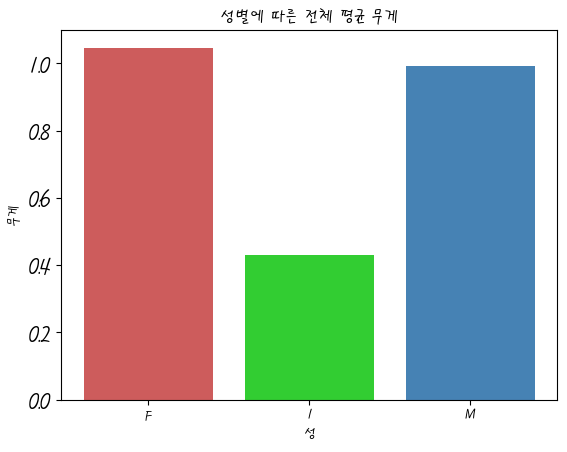

In [107]:

# 그래프 그리기
plt.bar(['F', 'I', 'M'], grouped.mean(), color=['indianred', 'limegreen', 'steelblue'])


# y축 눈끔 키우기
plt.yticks(fontsize=15)
# 그래프 제목, x축 라벨, y축 라벨 설정
plt.title('성별에 따른 전체 평균 무게')
plt.xlabel('성')
plt.ylabel('무게')

# 그래프 출력
plt.show()


# 성별에 따른 살점 평균 무게 ( M -> F ->I 순서)

In [108]:
grouped = df['Shucked weight'].groupby(df['Sex'])
grouped

grouped.mean()


Sex
F    0.446188
I    0.191035
M    0.432946
Name: Shucked weight, dtype: float64

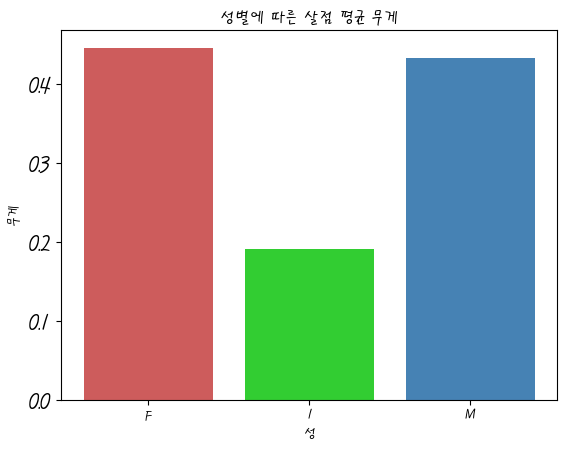

In [109]:
# 그래프 그리기
plt.bar(['F', 'I', 'M'], grouped.mean(), color=['indianred', 'limegreen', 'steelblue'])


# y축 눈끔 키우기
plt.yticks(fontsize=15)
# 그래프 제목, x축 라벨, y축 라벨 설정
plt.title('성별에 따른 살점 평균 무게')
plt.xlabel('성')
plt.ylabel('무게')

# 그래프 출력
plt.show()

# 성별에 따른 평균 무게 상관도 (산점도 그래프)

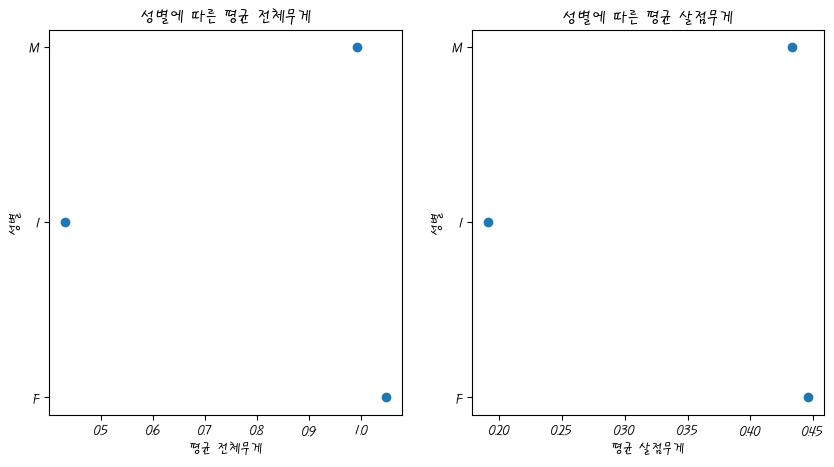

In [120]:
# 성별에 따른 평균 무게 계산
mean_weight_whole = df.groupby('Sex')['Whole weight'].mean()
mean_weight_shucked = df.groupby('Sex')['Shucked weight'].mean()

# subplots 생성
fig, ax = plt.subplots(1, 2, figsize=(10, 5))

# 산점도 그리기
ax[0].scatter(mean_weight_whole.values, mean_weight_whole.index)
ax[1].scatter(mean_weight_shucked.values, mean_weight_shucked.index)

# x축, y축 레이블 설정
ax[0].set_xlabel('평균 전체무게')
ax[0].set_ylabel('성별')
ax[1].set_xlabel('평균 살점무게')
ax[1].set_ylabel('성별')

# 그래프 제목 설정
ax[0].set_title('성별에 따른 평균 전체무게')
ax[1].set_title('성별에 따른 평균 살점무게')

# 그래프 출력
plt.show()


# 위 그래프를 보면 성별에 따른 평균 무게(전체무게, 살점무게)는 상관이 없다고 봐야한다. 
# 따라서, 암수 구분해서 주문하는 것은 의미가 없다고 봐도 무방(단, I(infant)는 논외)